<a href="https://colab.research.google.com/github/Atharvp18/KGB/blob/main/AMOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install --quiet kaggle

In [3]:
from google.colab import files 
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"atharvp180102","key":"8ceaa8d7fa16631cf8090271f62d5eee"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/.  

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d nareshbhat/health-care-data-set-on-heart-attack-possibility

health-care-data-set-on-heart-attack-possibility.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
from zipfile import ZipFile 
zf=ZipFile('health-care-data-set-on-heart-attack-possibility.zip')
df=pd.read_csv(zf.open('heart.csv'))

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#Seperating Categorical Values
cat_variables=['sex','cp','fbs','restecg','exang','ca','thal','slope']
df[cat_variables]=df[cat_variables].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


In [12]:
#Creating dummy variables for categorical variables
df1=pd.get_dummies(df[['sex','cp','fbs','restecg','exang','ca','thal','slope']],drop_first=True)
df=pd.concat([df,df1],axis=1)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3', 'slope_1',
       'slope_2'],
      dtype='object')

In [14]:
df=df.drop(['sex','cp','fbs','restecg','exang','ca','thal','slope'],axis=1)

In [15]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3', 'slope_1',
       'slope_2'],
      dtype='object')

In [16]:
df.shape

(303, 23)

In [17]:
#Starting train test split
#Assigning independent columns to X
X=df.drop('target',axis=1)
Y=df['target']
X_train,X_test, Y_train,Y_test=train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=100)


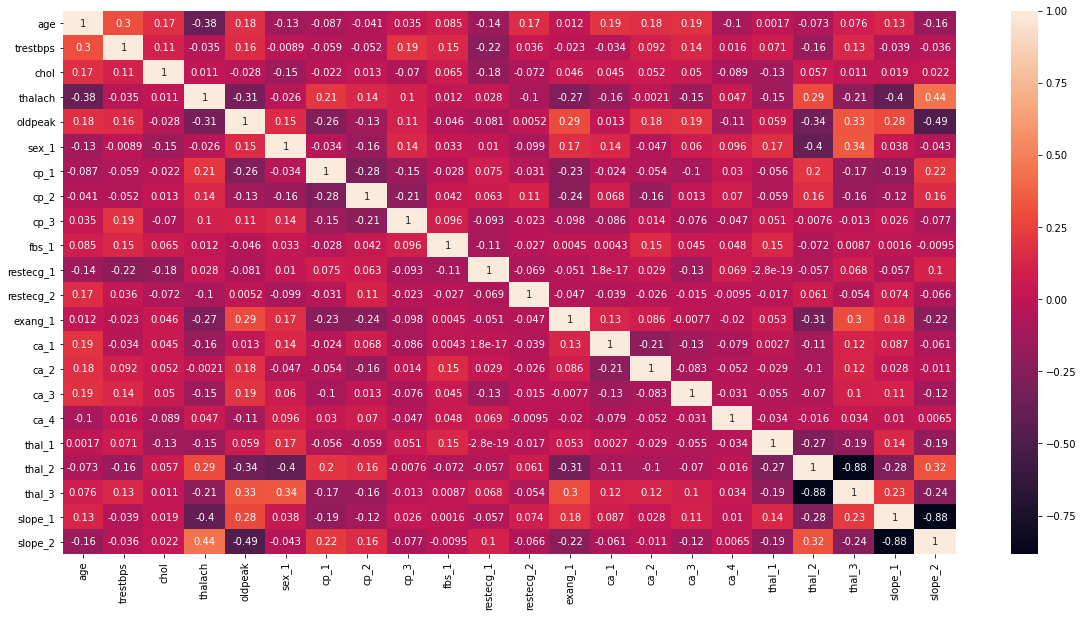

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [19]:
X_train=X_train.drop(['thal_2','slope_2'],axis=1)
X_test=X_test.drop(['thal_2','slope_2'],axis=1)

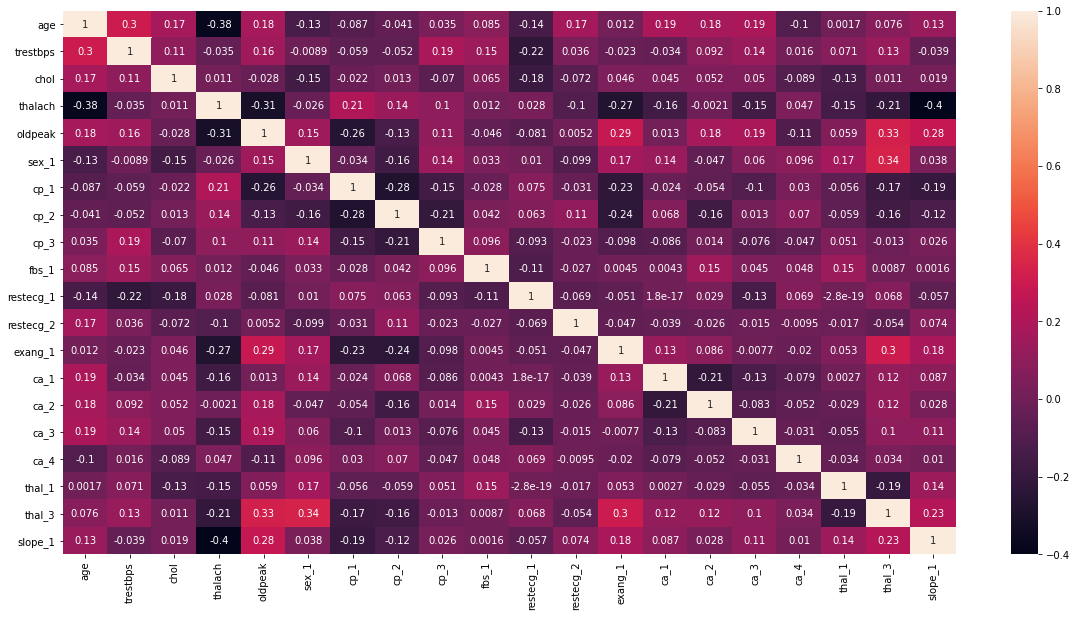

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [21]:
svcclassifier=SVC(kernel='linear')
svcclassifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svc_predict = svcclassifier.predict(X_test)
svc_confusion_matrix = confusion_matrix(Y_test, svc_predict)
svc_accuracy_score = accuracy_score(Y_test, svc_predict)
print(svc_predict)

[1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0]


In [23]:
print("confusion matrix")
print(svc_confusion_matrix)

print("\n Accuracy of SVC classification:",svc_accuracy_score*100,'\n')
print(classification_report(Y_test,svc_predict))


confusion matrix
[[35 11]
 [ 2 43]]

 Accuracy of SVC classification: 85.71428571428571 

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        46
           1       0.80      0.96      0.87        45

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91

